In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
car1 = pd.read_csv(r"F:\AIML\Sem 6\ML Mini Project\train-data.csv")

In [4]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
car1 = car1.drop(['Unnamed: 0','New_Price'],axis=1)

In [6]:
i = car1[(car1['Fuel_Type']=='LPG') | (car1['Fuel_Type']=='Electric')].index
car1.drop(i,axis=0,inplace=True)

In [7]:
i = car1[(car1['Owner_Type']=='Fourth & Above')].index
car1.drop(i,axis=0,inplace=True)

In [8]:
i = car1[(car1['Seats']==10.0) | (car1['Seats']==2.0) | (car1['Seats']==9.0) | (car1['Seats']==0.0)].index
car1.drop(i,axis=0,inplace=True)

In [9]:
i = car1[(car1['Year']==2001) | (car1['Year']==2000)| (car1['Year']==1998) | (car1['Year']==1999)].index
car1.drop(i,axis=0,inplace=True)

In [10]:
car1.shape 

(5956, 12)

In [11]:
import re

In [12]:
car1['Mileage'] = car1['Mileage'].str.replace('[^0-9.-]', '')
car1['Engine'] = car1['Engine'].str.replace('[^0-9.-]', '')
car1['Power'] = car1['Power'].str.replace('[^0-9.-]', '')

car1['Mileage'] = pd.to_numeric(car1['Mileage']) 
car1['Engine'] = pd.to_numeric(car1['Engine'])
car1['Power'] = pd.to_numeric(car1['Power'])

car1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [13]:
print((car1['Mileage']==0).any())
print((car1['Power']==0).any())
print((car1['Kilometers_Driven']==0).any())
print((car1['Engine']==0).any())

True
False
False
False


In [14]:
Mileage_mean=car1['Mileage'].mean()
car1['Mileage']=np.where(car1['Mileage']==0, Mileage_mean, car1['Mileage'])

In [15]:
car1 = car1[car1.Engine.notnull()]

In [16]:
Power_mean=car1['Power'].mean()
car1['Power']=np.where(car1['Power'].isna(),Power_mean,car1['Power'])

In [17]:
car1=car1.dropna(axis=0)
car1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [18]:
car1['Seats']=car1['Seats'].astype(int)

In [19]:
car1.shape

(5916, 12)

In [20]:
q3k = car1['Kilometers_Driven'].quantile(0.75) 
q1k = car1['Kilometers_Driven'].quantile(0.25)

iqrk = q3k - q1k
iqrk

38636.75

In [21]:
def outlier_km(car1):
    km = car1['Kilometers_Driven']
    if km > (q3k + 1.5 * iqrk) or km < (q1k - 1.5 * iqrk):
        return True
    else:
        return False

In [23]:
q3p = car1['Power'].quantile(0.75) 
q1p = car1['Power'].quantile(0.25)

iqrp = q3p - q1p
print(iqrp)
iqrp = 60.1
iqrp

60.099999999999994


60.1

In [24]:
def outlier_pw(car1):
    pw=car1['Power']
    if pw > (q3p + 1.5 * iqrp) or pw < (q1p - 1.5 * iqrp):
        return True
    else:
        return False

In [25]:
q3e = car1['Engine'].quantile(0.75) 
q1e = car1['Engine'].quantile(0.25)

iqre = q3e - q1e
iqre

770.0

In [26]:
def outlier_eng(car1):
    eng=car1['Engine']
    if eng > (q3e + 1.5 * iqre) or eng < (q1e - 1.5 * iqre):
        return True
    else:
        return False

In [27]:
q3m = car1['Mileage'].quantile(0.75) 
q1m = car1['Mileage'].quantile(0.25)

iqrm = q3m - q1m
iqrm

5.700000000000001

In [28]:
iqrm = 5.7
iqrm

5.7

In [29]:
def outlier_mile(car1):
    mile=car1['Mileage']
    if mile > (q3m + 1.5 * iqrm) or mile < (q1m - 1.5 * iqrm):
        return True
    else:
        return False

In [30]:
car1['outlier_KM'] = car1.apply(outlier_km, axis = 1) 
car1['outlier_Power'] = car1.apply(outlier_pw, axis = 1) 
car1['outlier_Engine'] = car1.apply(outlier_eng, axis = 1) 
car1['outlier_Mileage'] = car1.apply(outlier_mile, axis = 1) 

car1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,outlier_KM,outlier_Power,outlier_Engine,outlier_Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,False,False,False,False
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,False,False,False,False
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,False,False,False,False
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,False,False,False,False
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,False,False,False,False


In [31]:
def outliers(car1):
    if (car1['outlier_KM']==False) and (car1['outlier_Power']==False) and (car1['outlier_Engine']==False) and (car1['outlier_Mileage']==False):
        return False
    else:
        return True

In [32]:
car1['Is Outlier'] = car1.apply(outliers, axis = 1) 

In [33]:
car2 = car1.loc[car1['Is Outlier'] == False]
car2

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,outlier_KM,outlier_Power,outlier_Engine,outlier_Mileage,Is Outlier
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,False,False,False,False,False
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,False,False,False,False,False
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,False,False,False,False,False
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,False,False,False,False,False
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5,4.75,False,False,False,False,False
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5,4.00,False,False,False,False,False
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8,2.90,False,False,False,False,False
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5,2.65,False,False,False,False,False


In [34]:
dlst = ['outlier_KM','outlier_Power','outlier_Engine','outlier_Mileage','Is Outlier']

def outlier_rm(data):
    for i in dlst:
        del data[i]
        
        
outlier_rm(car2)

In [35]:
car2.shape

(5463, 12)

In [36]:
fuel_map = {'Petrol':0, 'Diesel' : 1, 'CNG' : 2}
trans_map = {'Manual':0, 'Automatic' : 1}
owner_map = {'First':0, 'Second':1, 'Third':2}
loc_map = {'Mumbai':0, 'Pune':1, 'Chennai':2, 'Coimbatore':3, 'Jaipur':4, 'Kochi':5, 'Kolkata':6, 'Delhi':7, 
           'Bangalore':8, 'Hyderabad':9, 'Ahmedabad':10}

In [37]:
car2['Fuel'] = car2.Fuel_Type.map(fuel_map)
car2['Transmission_Type'] = car2.Transmission.map(trans_map)
car2['Owner'] = car2.Owner_Type.map(owner_map)
car2['Locations'] = car2.Location.map(loc_map)

In [38]:
car3=car2.drop(['Fuel_Type','Transmission','Owner_Type','Location'], axis=1)
car3.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel,Transmission_Type,Owner,Locations
0,Maruti Wagon R LXI CNG,2010,72000,26.60,998.0,58.16,5,1.75,2,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5,12.50,1,0,0,1
2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5,4.50,0,0,0,2
3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7,6.00,1,0,0,2
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5,17.74,1,1,1,3


In [39]:
car3['Current_Year'] = 2023
car3['No_Year'] = car3['Current_Year'] - car3['Year']

In [40]:
car3 = car3.drop(['Year','Current_Year'],axis = 1)
car3.head()

,Name,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel,Transmission_Type,Owner,Locations,No_Year
0,Maruti Wagon R LXI CNG,72000,26.60,998.0,58.16,5,1.75,2,0,0,0,13
1,Hyundai Creta 1.6 CRDi SX Option,41000,19.67,1582.0,126.20,5,12.50,1,0,0,1,8
2,Honda Jazz V,46000,18.20,1199.0,88.70,5,4.50,0,0,0,2,12
3,Maruti Ertiga VDI,87000,20.77,1248.0,88.76,7,6.00,1,0,0,2,11
4,Audi A4 New 2.0 TDI Multitronic,40670,15.20,1968.0,140.80,5,17.74,1,1,1,3,10


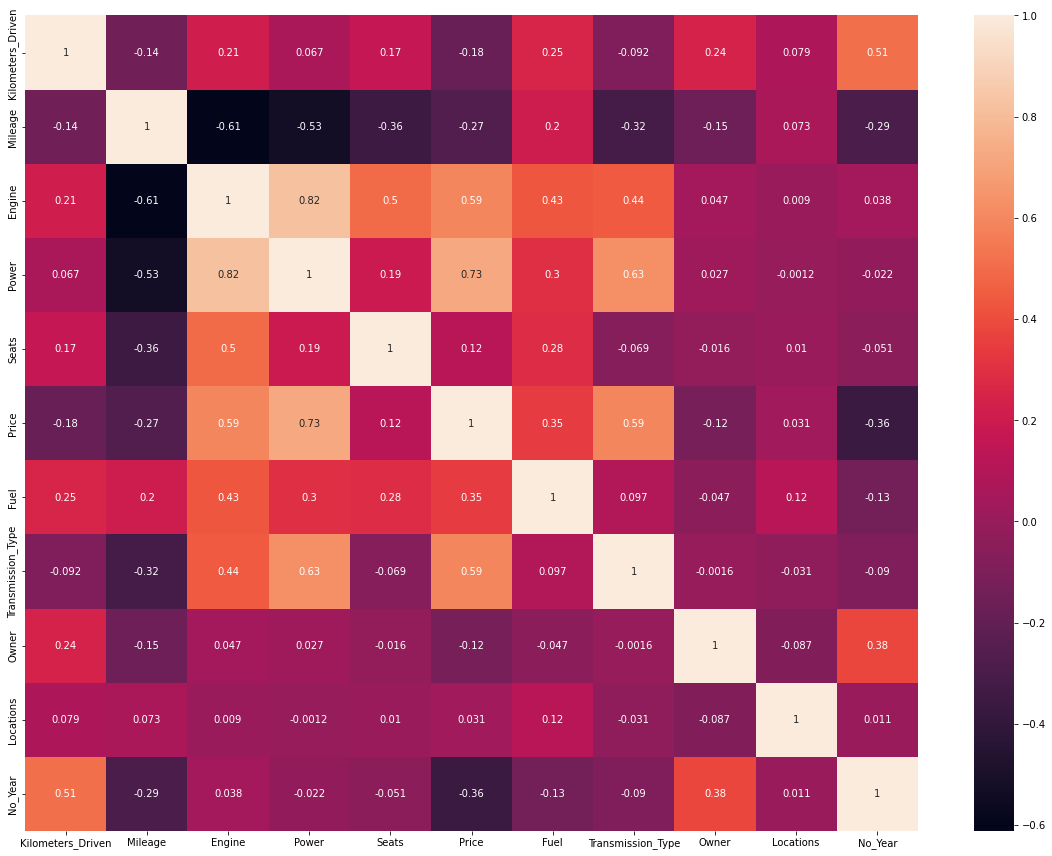

In [41]:
plt.figure(figsize=(20, 15))
sns.heatmap(car3.corr(),cmap='rocket', annot=True)
plt.show()

In [42]:
cars = car3.drop(['Name'], axis=1)

In [43]:
X = cars.drop(['Price'], axis=1)
y = cars.Price

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [45]:
print("Shape of Input features: {}".format(X.shape))
print("Shape of Output features: {}".format(y.shape))

Shape of Input features: (5463, 10)
Shape of Output features: (5463,)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100)

In [48]:
from keras.models import Sequential
from keras.layers import Dense

In [50]:
# Build the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', mse)

Epoch 1/100
137/137 [==============================] - 1s 2ms/step - loss: 43.5482
Epoch 2/100
137/137 [==============================] - 0s 2ms/step - loss: 12.4006
Epoch 3/100
137/137 [==============================] - 0s 3ms/step - loss: 11.1475
Epoch 4/100
137/137 [==============================] - 0s 2ms/step - loss: 10.6460
Epoch 5/100
137/137 [==============================] - 0s 2ms/step - loss: 10.1590
Epoch 6/100
137/137 [==============================] - 0s 2ms/step - loss: 9.7843
Epoch 7/100
137/137 [==============================] - 0s 2ms/step - loss: 9.4181
Epoch 8/100
137/137 [==============================] - 0s 2ms/step - loss: 9.4987
Epoch 9/100
137/137 [==============================] - 0s 3ms/step - loss: 8.9934
Epoch 10/100
137/137 [==============================] - 0s 3ms/step - loss: 8.8376
Epoch 11/100
137/137 [==============================] - 0s 3ms/step - loss: 8.6911
Epoch 12/100
137/137 [==============================] - 0s 2ms/step - loss: 8.4581
Epoch 13

137/137 [==============================] - 0s 2ms/step - loss: 4.3269
Epoch 100/100
137/137 [==============================] - 0s 2ms/step - loss: 4.5873
Mean Squared Error: 6.7895989418029785


In [ ]:
# Make predictions
sample_data = np.array([[2015, 50000, 4, 1, 0, 1, 0, 1]])
sample_data = scaler.transform(sample_data)
predicted_price = model.predict(sample_data)
print('Predicted Price:', predicted_price)